In [4]:
import sys
import os
import matplotlib as mpl
import tqdm
import numpy as np
import matplotlib.pyplot as plt
import time
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from matplotlib.cm import ScalarMappable

sys.path.append('../my_funcs/')
from pipeline_main import pipeline
from pipeline_streamers import phi_average
from pipeline_2D import to_osyris_ivs


# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)


Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4165/4165 [00:05<00:00, 811.97it/s]


Converged mean angular momentum vector after 1 iteration(s)
22759923.46150082
Looping through patches, assigning azimuthal velocities to all cells and extracing them within given cylindrical coordiantes


100%|██████████| 4165/4165 [00:00<00:00, 27411.21it/s]

Disk size: 10.2 au


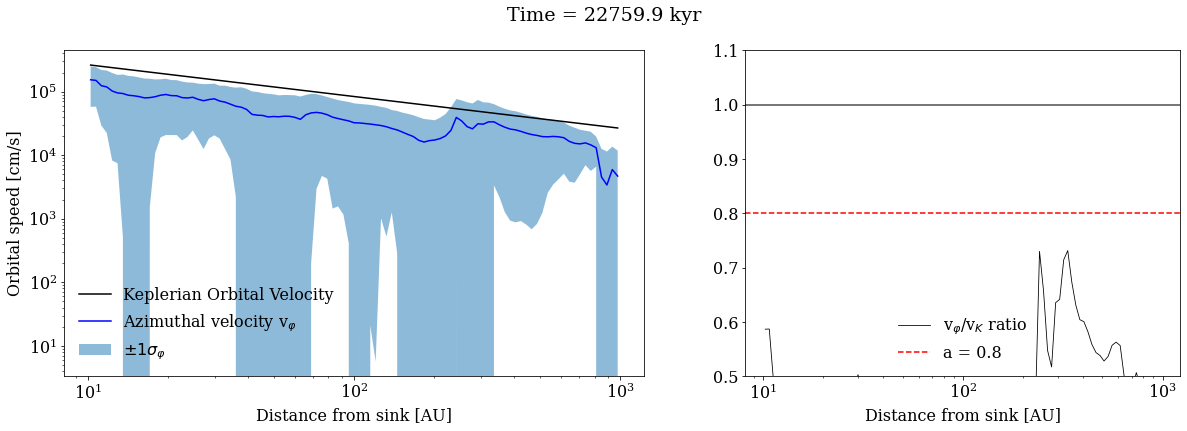

In [5]:
#data = pipeline(snap = 280, run = 'my_core_13lacc', sink_id = 13)

#data = pipeline(snap = 357, run = 'my_core_13lacc', sink_id = 13)
data = pipeline(snap = 271, run = 'goodold13', sink_id = 13)
data.recalc_L(verbose = 1); 
print(data.time)
data.calc_disksize()
plt.suptitle(f'Time = {data.time / 1e3:2.1f} kyr');

In [6]:
variable = ['bx**2 + by**2 + bz**2', 'P']
data.to_osyris_ivs(variables=variable, view = 200, resolution=1000, data_name='data')

Looping over DISPATCH data to extract data at highest level


100%|██████████| 1411/1411 [00:06<00:00, 207.54it/s]


Setting up Osyris data structure


/groups/astro/kxm508/.local/lib/python3.8/site-packages/numpy/ma/core.py:711: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  data = np.array(a, copy=False, subok=subok)


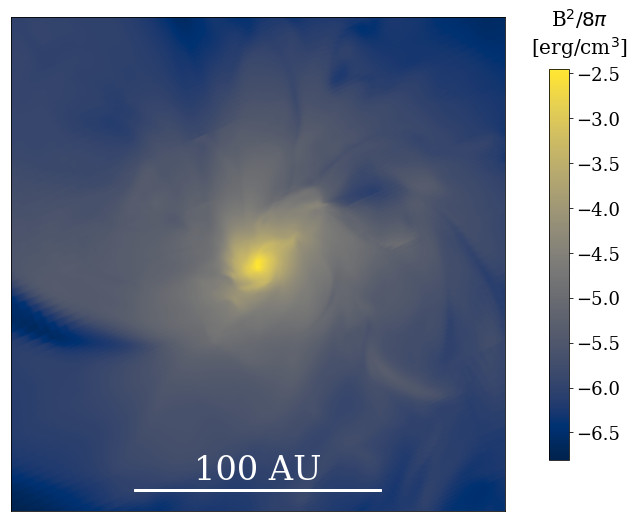

In [7]:
fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data.osyris_ivs['data'][0] * data.sn.scaling.b**2 / (8 * np.pi)), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'cividis')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('B$^2/8π$\n[erg/cm$^3$]', labelpad = -40, y = 1.16, rotation = 0, fontsize = 20)

axs.set_xticks([]); axs.set_yticks([])
scalebar = AnchoredSizeBar(axs.transData, 100, '100 AU', 'lower center', 
                    pad=0.5,
                    color='white',
                    
                    frameon=False,
                    fontproperties = fm.FontProperties(size=28*1.2),
                    size_vertical=1,
                    label_top=True)

axs.add_artist(scalebar)


cbar.ax.tick_params(labelsize=18)

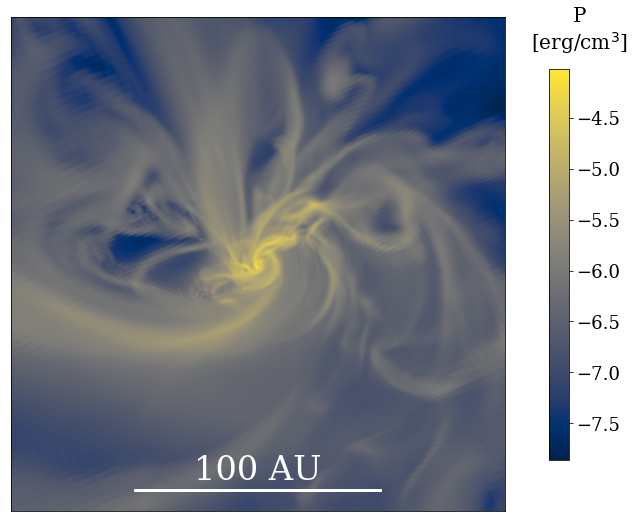

In [8]:
fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data.osyris_ivs['data'][1] * data.cgs_pressure), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'cividis')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('P\n[erg/cm$^3$]', labelpad = -40, y = 1.16, rotation = 0, fontsize = 20)

axs.set_xticks([]); axs.set_yticks([])
scalebar = AnchoredSizeBar(axs.transData, 100, '100 AU', 'lower center', 
                    pad=0.5,
                    color='white',
                    
                    frameon=False,
                    fontproperties = fm.FontProperties(size=28*1.2),
                    size_vertical=1,
                    label_top=True)

axs.add_artist(scalebar)


cbar.ax.tick_params(labelsize=18)

# $$\beta = P\frac{8\pi}{B^2}$$

In [9]:
β = data.osyris_ivs['data'][1] * data.cgs_pressure / (data.osyris_ivs['data'][0] * data.sn.scaling.b**2 / (8 * np.pi))
X, Y = np.linspace(-100,100,1000), np.linspace(-100,100,1000),
xx,yy = np.meshgrid(X, Y)

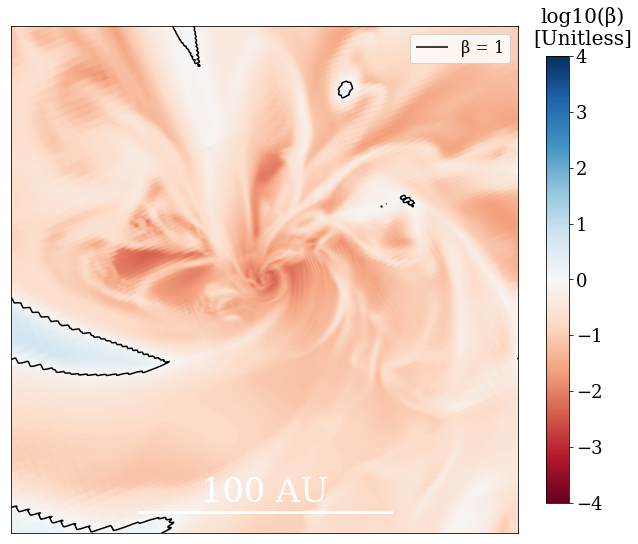

In [10]:
fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(β), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'RdBu', vmin =-4, vmax = 4)
cbar = fig.colorbar(cs, ax = axs, fraction = 0.04, pad = 0.05);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('log10(β)\n[Unitless]', labelpad = -20, y = 1.11, rotation = 0, fontsize = 20)

axs.set_xticks([]); axs.set_yticks([])
scalebar = AnchoredSizeBar(axs.transData, 100, '100 AU', 'lower center', 
                    pad=0.5,
                    color='white',
                    
                    frameon=False,
                    fontproperties = fm.FontProperties(size=28*1.2),
                    size_vertical=1,
                    label_top=True)

axs.add_artist(scalebar)

ct = axs.contour(xx, yy, np.log10(β), [np.log10(1)], colors = ['black'])

contour_labels = ['β = 1']
for i in range(len(contour_labels)):
    ct.collections[i].set_label(contour_labels[i])


cbar.ax.tick_params(labelsize=18)
plt.legend()

# From Åke:
### *Filaments with beta>1 would normally be created by converging supersonic flows, which are more often stopped by magnetic pressure than by thermal pressure (which only grows linearly with near-isothermal mass density, while magnetic pressure grows quadratically with magnetic surface density)*<br>
### *Filaments can also become to some extent become self-contained, if the magnetic field is twisted along the filament ...*<br>
### *So, we can see that the beta>1 regions are intermittent (with low filling-factor), which makes good sense* WHY???

# More Åke:
### *A probably somewhat challenging task would be to show the (negative) divergence of the velocity field perpendicular to B;  that is a relevant scalar in the context ...*

$$ \def\uu{\mathbf{u}}
\def\bb{\mathbf{b}}$$
# $$\uu_{perp} = \uu - \frac{\uu\cdot\bb}{(\bb\cdot\bb)}\bb$$
# $$div_{uperp} = \nabla\cdot(\uu_{perp}) $$

# Now doing the same with the phi-average plot

Transforming old z-coordinate into mean angular momentum vector


  0%|          | 0/4165 [00:00<?, ?it/s]

100%|██████████| 4165/4165 [00:00<00:00, 4716.72it/s]
/lustre/hpc/astro/kxm508/codes/dispatch2/experiments/ISM/python/to_2D/../my_funcs/pipeline_streamers.py:170: RuntimeWarning: invalid value encountered in true_divide
  hist_val /= hist_mass
/lustre/hpc/astro/kxm508/codes/dispatch2/experiments/ISM/python/to_2D/../my_funcs/pipeline_streamers.py:172: RuntimeWarning: invalid value encountered in true_divide
  hist_ρ = (hist_mass* self.sn.scaling.m) / hist_vol


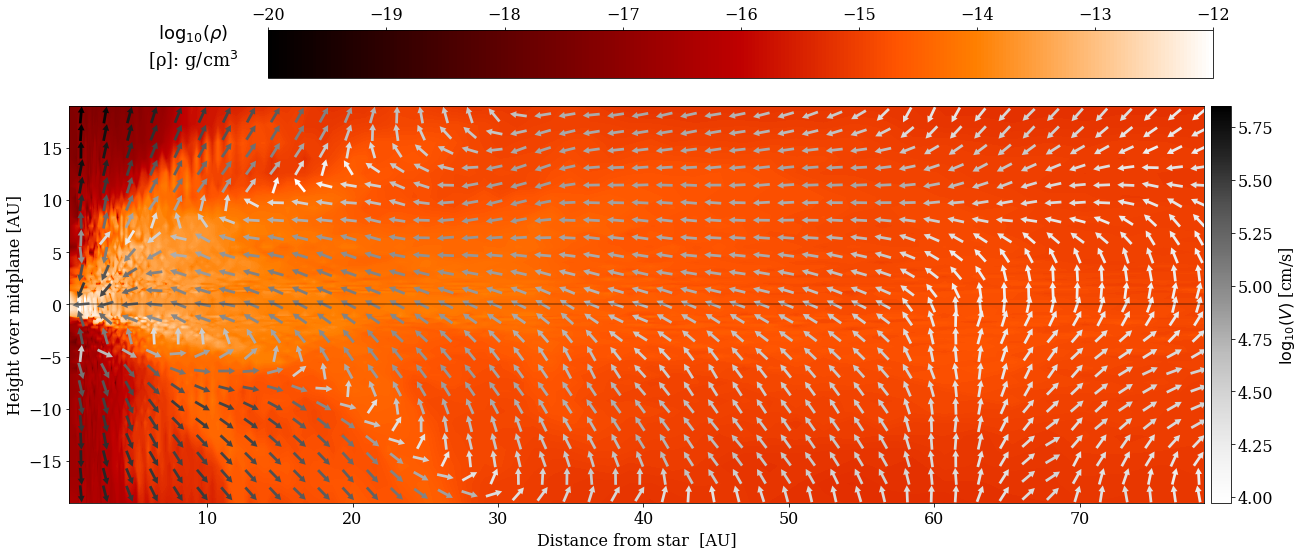

In [11]:
R, z, val_P,  rr_v, zz_v, vr, vz, arrow_length = data.phiaverage(ivs = 'P', radius=80, NR = 120, quiver_dens=0.4, get_quiver=True)

[Text(0.5, 1.0, 'Pressure')]

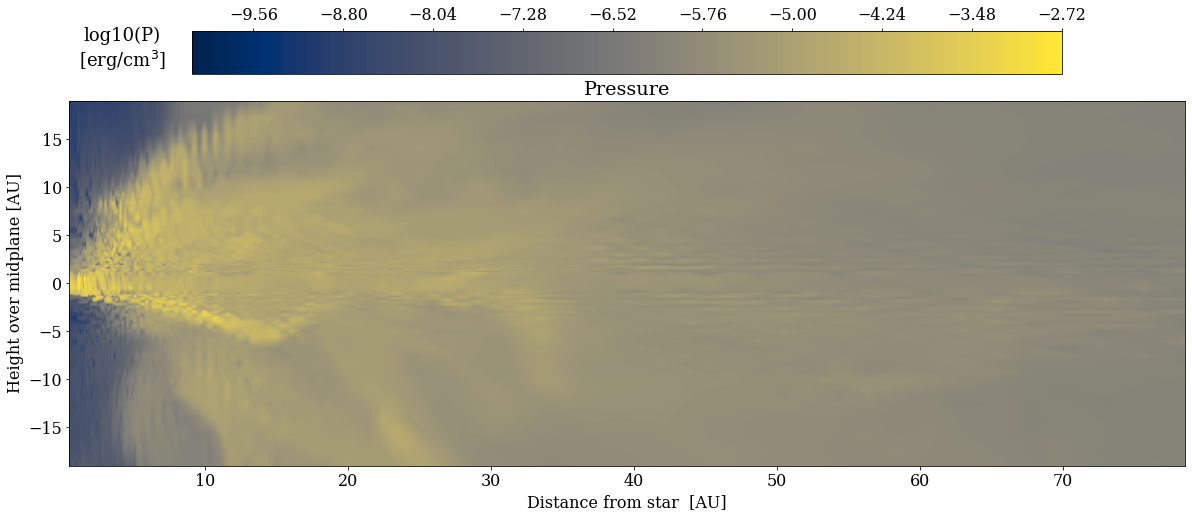

In [12]:
fig, axs = plt.subplots(figsize = (20,8))
cs = axs.contourf(R * data.au_length, z*data.au_length, np.log10(val_P.T * data.cgs_pressure), origin = 'lower', levels = 200, cmap = 'cividis')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.1, pad = 0.06, location = 'top');
cbar.set_label('log10(P)\n[erg/cm$^3$]', labelpad = -60, x = -0.08, rotation = 0, fontsize = 18)
axs.set(ylabel = 'Height over midplane [AU]', xlabel = 'Distance from star  [AU]');
axs.set(title='Pressure')

In [13]:
R, z, val_B = data.phiaverage(ivs = 'bx**2 + by**2 + bz**2', plot = False, radius=80, NR = 120)

[Text(0.5, 1.0, 'Magnetic pressure')]

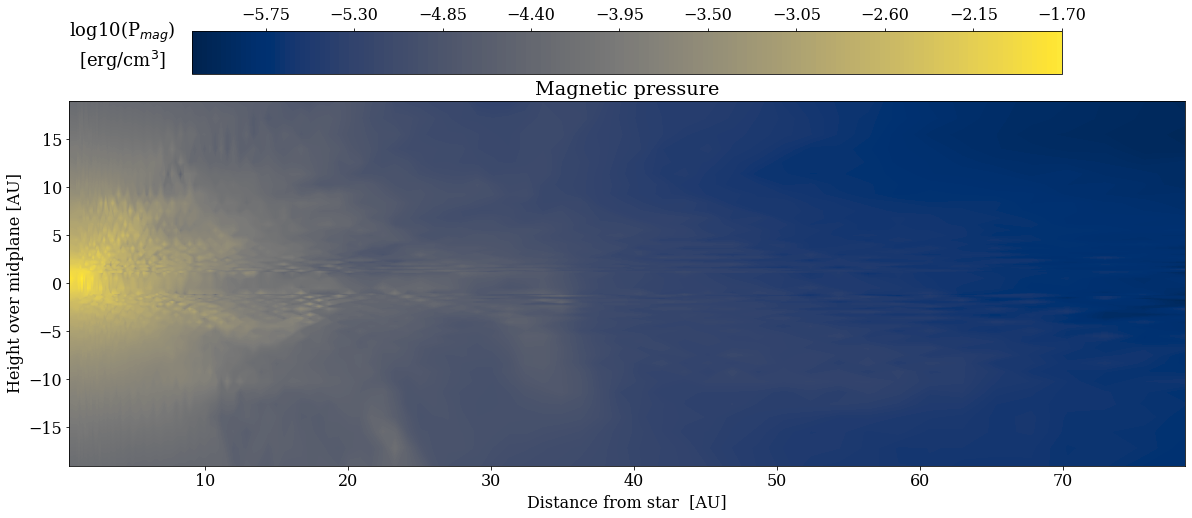

In [14]:
fig, axs = plt.subplots(figsize = (20,8))
cs = axs.contourf(R * data.au_length, z*data.au_length, np.log10(val_B.T * data.sn.scaling.b**2 / (np.pi * 8)), origin = 'lower', levels = 200, cmap = 'cividis')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.1, pad = 0.06, location = 'top');
cbar.set_label('log10(P$_{mag}$)\n[erg/cm$^3$]', labelpad = -60, x = -0.08, rotation = 0, fontsize = 18)
axs.set(ylabel = 'Height over midplane [AU]', xlabel = 'Distance from star  [AU]');
axs.set(title='Magnetic pressure')

In [15]:
β_phiaverage = val_P * data.cgs_pressure / (val_B * data.sn.scaling.b**2 / (8 * np.pi))

/tmp/ipykernel_3462010/3743266759.py:18: UserWarning: The following kwargs were not used by contour: 'ls'
  ct = axs.contour(xx, yy, np.log10(β_phiaverage.T), [np.log10(1)], colors = ['black'], alpha = 0.6, ls = '--')


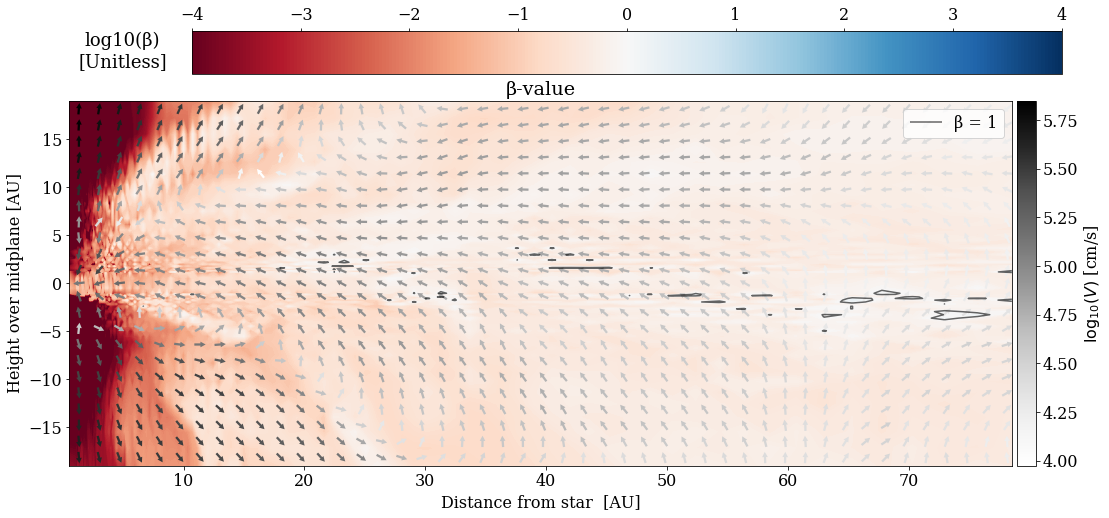

In [16]:
xx, yy = np.meshgrid(R * data.au_length, z * data.au_length)

quiver_dens = 0.5

fig, axs = plt.subplots(figsize = (20,8))

log_vmin = -4; log_vmax = 4
cs = axs.contourf(R * data.au_length, z * data.au_length, np.log10(β_phiaverage.T), origin = 'lower', levels = 200, cmap = 'RdBu', vmin = log_vmin, vmax = log_vmax)

cbar = fig.colorbar(ScalarMappable(norm=cs.norm, cmap=cs.cmap), ticks = range(log_vmin, log_vmax + 1, 1), ax = axs, fraction = 0.1, pad = 0.06, location = 'top');


quiver = axs.quiver(rr_v * data.au_length, zz_v*data.au_length, vr , vz, np.log10(arrow_length), 
                            cmap=mpl.cm.Greys, headwidth = 2.5, headaxislength = 2.3, headlength = 2.3, pivot = 'mid', scale = 100 / (0.6 / quiver_dens));
cbar_vel = fig.colorbar(quiver, pad = 0.005)
cbar_vel.set_label('$\log_{10}(V)$ [cm/s]')

ct = axs.contour(xx, yy, np.log10(β_phiaverage.T), [np.log10(1)], colors = ['black'], alpha = 0.6, ls = '--')

contour_labels = ['β = 1']
for i in range(len(contour_labels)):
    ct.collections[i].set_label(contour_labels[i])

cbar.set_label('log10(β)\n[Unitless]', labelpad = -60, x = -0.08, rotation = 0, fontsize = 18)
axs.set(ylabel = 'Height over midplane [AU]', xlabel = 'Distance from star  [AU]');
axs.set(title='β-value')
plt.legend()

# From Åke
### *Is the B-field accumulating near the edge of full rotation?*
### It looks like the B-field is weakest at the edge of the rotation